House Price Prediction END-TO-END

Data cleaning

Feature Engineering

Outlier Detection

Dimensional Cutting(PCA)

In [250]:
# import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [168]:
# read input file
df = pd.read_csv("D:/Workspace/ML_ALGO/ml_algorithm/house_price_prediction/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [169]:
df.shape

(13320, 9)

In [170]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [171]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [172]:
# get area type counts
df.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [173]:
#drop irrelevant features
df1 = df.drop(['availability', 'balcony', 'society', 'area_type'], axis = 1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [174]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [175]:
# as the count of null values are very leass as compared to our 13k data so we can drop this an value
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [176]:
# as in size column there are data disrepancies we weill clean those
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [177]:
# make uniform value from size column to bhk column
df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))
df2.head()

C:\Users\anjali.jha\AppData\Local\Temp\ipykernel_63292\4064023449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split()[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [178]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [179]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


here is the data disrepancy as there won't be 27 or 43 bedrooms with area of 8k and 2.4k sqft

In [180]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [181]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


For this range data in total_sqft we need to take avg value of the range

In [182]:
def convert_range_area(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])/2)
    try:
        return float(x)
    except:
        return None

In [183]:
convert_range_area('889')

889.0

In [184]:
convert_range_area("234 - 789")

628.5

In [185]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_range_area)

In [186]:
df3.loc[122]

location      Hebbal
size           4 BHK
total_sqft    7145.0
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

In [187]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk


So here the data cleaning for column total_sqft is done there is no discrepanvy data anymore

Fature Engineering

In [188]:
df4 = df3.copy()
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [189]:
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [190]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [191]:
len(df4['location'].unique())

1304

In [192]:
df4.location = df4.location.apply(lambda x : x.strip())
location_stats = df4.groupby('location')['location'].agg("count").sort_values(ascending= False)
location_stats

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [193]:
len(location_stats[location_stats <= 10])

1052

In [194]:
less_than_10_location_data = location_stats[location_stats <= 10]
less_than_10_location_data

location
Ganga Nagar                  10
Gunjur Palya                 10
BTM 1st Stage                10
Sadashiva Nagar              10
Kalkere                      10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1052, dtype: int64

In [195]:
df4.shape

(13246, 7)

In [196]:
len(df4['location'].unique())

1293

In [197]:
df4.location = df4.location.apply(lambda x : "other" if x in less_than_10_location_data else x)
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [198]:
len(df4['location'].unique())

242

Earlier  1293 unique values were there in location column but after feature engineering the total unique value remains are 242

In [199]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Removal

In [200]:
df4[df4.total_sqft/df4.bhk <=300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,5 Bedroom,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649
13306,other,4 Bedroom,1200.0,5.0,325.0,4,27083.333333


In [201]:
df4.shape

(13246, 7)

its not possible to have 8 bedrooms which have an area of 600 sqft

In [202]:
df5 = df4[~(df4.total_sqft/df4.bhk <300)]
df5.shape

(12502, 7)

In [203]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [204]:
# for removing outlier we use std deviation and mean value 

def remove_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft <= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out

df6 = remove_outlier(df5)

In [205]:
df6.shape

(10231, 7)

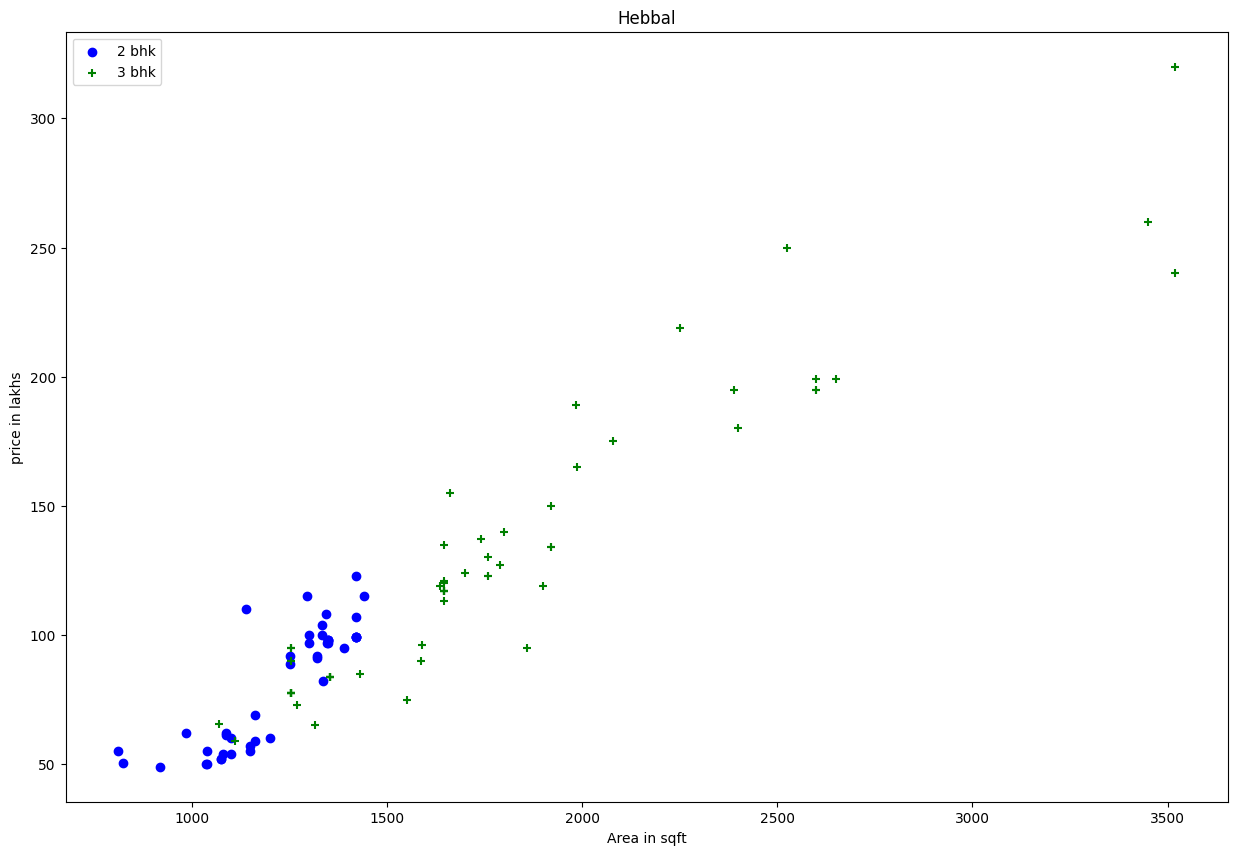

In [211]:
# there are data for which the price is higher for 2 bhk and less for 3 bhk

def plot(df, locs):
    bhk2 = df[(df.location == locs) & (df.bhk == 2)]
    bhk3 = df[(df.location == locs) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 bhk")
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = "green", label = "3 bhk")
    plt.xlabel("Area in sqft")
    plt.ylabel("price in lakhs")
    plt.title(locs)
    plt.legend()

plot(df6, "Hebbal")

In [216]:
# for removing those data points whose price is lower than the 1 bhk 

def remove_bhk_outlier(df):
    exclude_ind = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby("bhk"):
            stat = bhk_stats.get(bhk-1)
            if stat and stat['count'] > 4:
                exclude_ind = np.append(exclude_ind, bhk_df[bhk_df.price_per_sqft < (stat['mean'])].index)
    return df.drop(exclude_ind, axis = "index")



In [213]:
df6.shape

(10231, 7)

In [217]:
df7 = remove_bhk_outlier(df6)
df7.shape

(7118, 7)

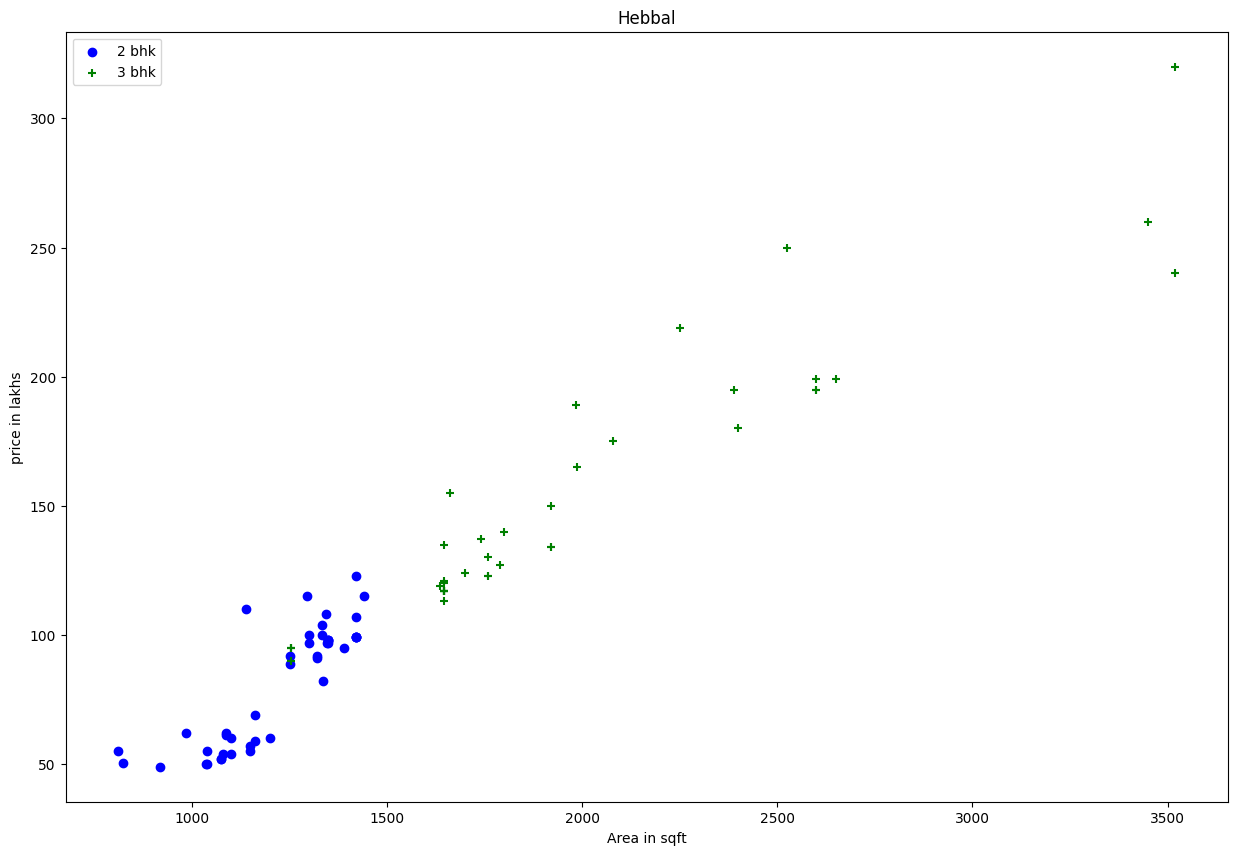

In [218]:
def plot(df, locs):
    bhk2 = df[(df.location == locs) & (df.bhk == 2)]
    bhk3 = df[(df.location == locs) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 bhk")
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = "green", label = "3 bhk")
    plt.xlabel("Area in sqft")
    plt.ylabel("price in lakhs")
    plt.title(locs)
    plt.legend()

plot(df7, "Hebbal")

As by removing outliers bhk and price column the graph looks logical

Text(0, 0.5, 'count')

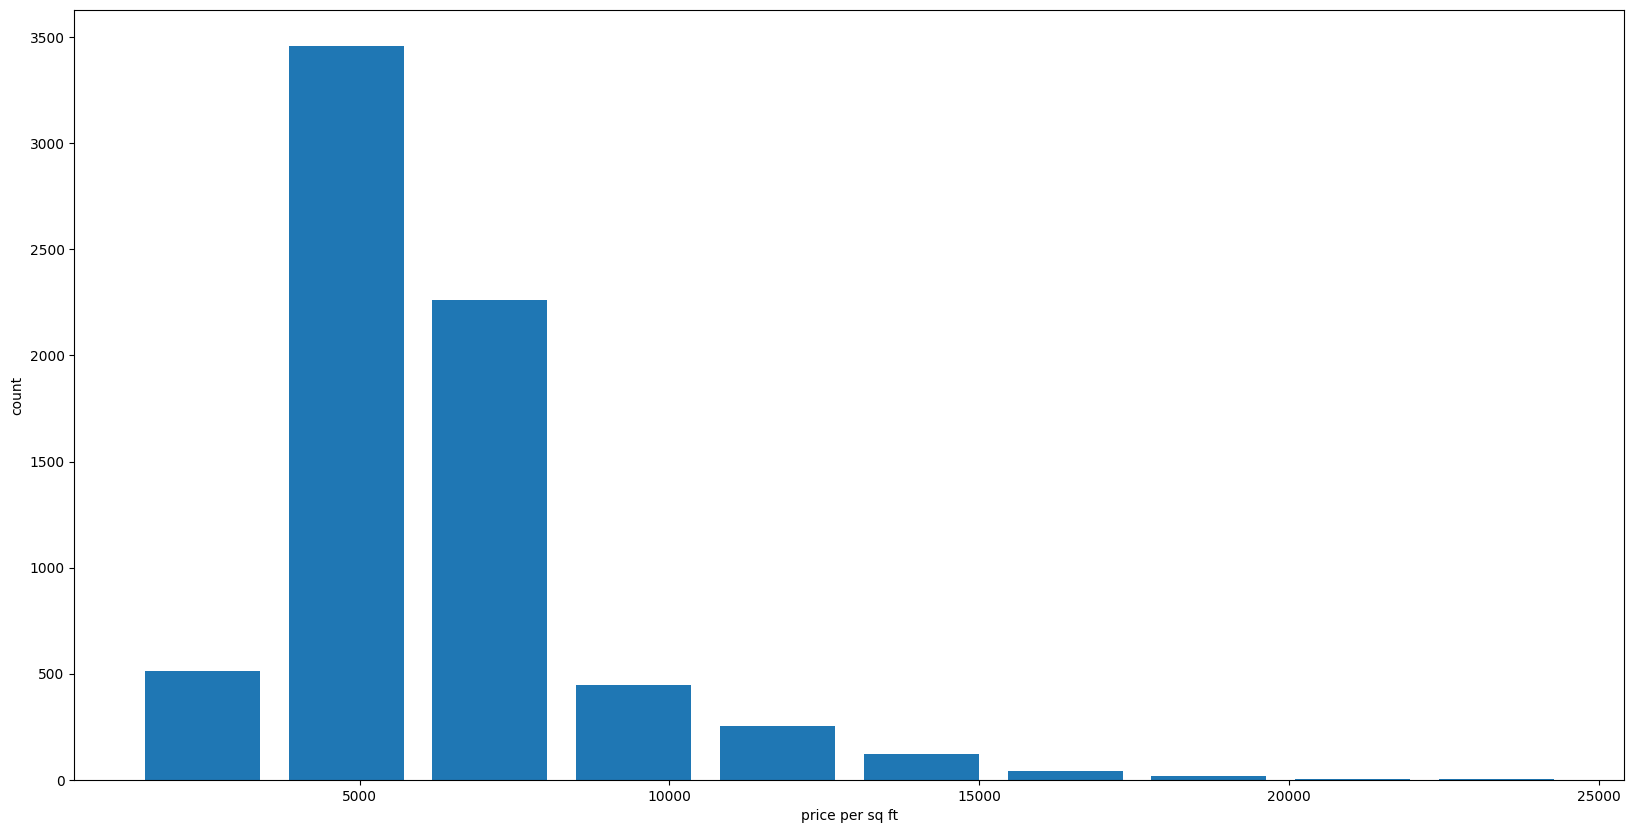

In [219]:
# represent histogram
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df7.price_per_sqft, rwidth= 0.8)
plt.xlabel("price per sq ft")
plt.ylabel("count")

In [220]:
# print the bathrooms
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [222]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [224]:
df7[df7['bath'] > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5273,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8476,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8565,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9298,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9629,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

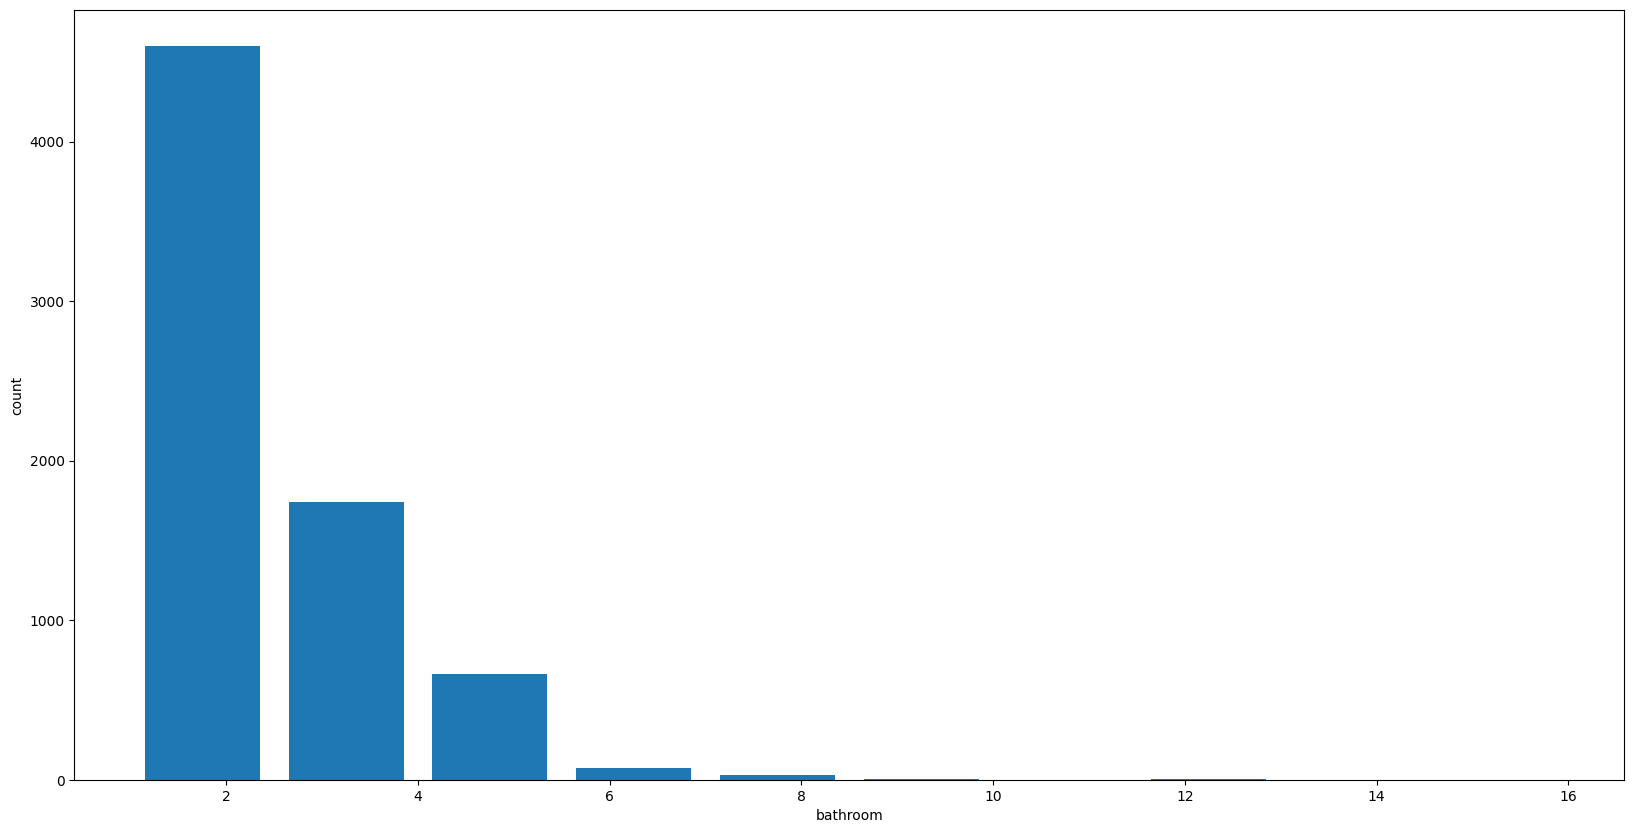

In [225]:
# represent histogram for bath
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df7.bath, rwidth= 0.8)
plt.xlabel("bathroom")
plt.ylabel("count")

In [226]:
#there are few outliers present in bath columns like 10, 12, 14, 16
df7[df7['bath'] > df7['bhk'] + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1625,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5234,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6705,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8401,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [231]:
df8 = df7[~(df7['bath'] > df7['bhk'] + 2)]
df8.shape

(7114, 7)

In [232]:
df9 = df8.drop(['size', 'price_per_sqft'], axis = 1)
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


Model Selection

In [240]:
# using one hot encoding for location column to covert text to numeric
dummies = pd.get_dummies(df9.location)
dummies = dummies.astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
df10 = pd.concat([df9, dummies.drop('other', axis = 1)], axis = "columns")
df11 = df10.drop("location", axis = 1)
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
df11.shape

(7114, 245)

In [245]:
x = df11.drop("price", axis = 1)
y = df11.price

In [246]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1)

In [248]:
print(len(x_train), len(x_test))

5335 1779


In [251]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)

0.8604887535949306

In [252]:
lr.score(x_test, y_test)

0.8125996597801621

In [267]:
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
c_split = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
c_score = cross_val_score(LinearRegression(), x, y, cv=c_split)
c_score

array([0.85102712, 0.838827  , 0.84584103, 0.77217311, 0.81047915])

In [270]:
models_all = {
    "linear_regression": {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', LinearRegression())
        ]),
        'params': {
            'regressor__fit_intercept': [True, False]
        }
    },

    'lasso' : {
        'model' : Lasso(),
        'params' : {
            'alpha' : [1, 2],
            'selection' : ['random', 'cyclic']
        }
    },

    'decision_tree' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'criterion': ['mse', 'friedman_mse', 'mae'],
            'splitter' : ['best', 'random']
        }
    }
}

models_all['linear_regression']

{'model': Pipeline(steps=[('scaler', StandardScaler()),
                 ('regressor', LinearRegression())]),
 'params': {'regressor__fit_intercept': [True, False]}}

In [273]:

score = []
cv = ShuffleSplit(n_splits=5, test_size= 0.2, random_state = 0)
for algo_name, algo in models_all.items():
    g_s = GridSearchCV(algo['model'], algo['params'], cv = cv, return_train_score= False)
    g_s.fit(x, y)
    score.append({
        'algo_name' : algo_name,
        'algo_best_score' : g_s.best_score_,
        'algo_best_params' : g_s.best_params_
    })

result_df = pd.DataFrame(score)
result_df

d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\Workspace\ML_ALGO\menv\lib\site-pack

,algo_name,algo_best_score,algo_best_params
0,linear_regression,0.823669,{'regressor__fit_intercept': True}
1,lasso,0.679205,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.707376,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Here it shows the linear regression has the highest accuracy

In [274]:
# how to get any column location
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [276]:
np.where(x.columns == 'Vishveshwarya Layout')[0][0]

np.where(x.columns == '1st Block Jayanagar')[0][0]

np.int64(3)

In [279]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    y = np.zeros(len(x.columns))
    y[0] = sqft
    y[1] = bath
    y[2] = bhk
    if loc_index >= 0:
        y[loc_index] = 1

    return lr.predict([y])[0]


In [280]:
predict_price("Vishveshwarya Layout", 1000, 2, 3)

d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(8.18350282328062)

In [281]:
predict_price('1st Phase JP Nagar', 1000,2,2)

d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(87.2694443470491)

In [284]:
predict_price('1st Phase JP Nagar', 2000,2,3)

d:\Workspace\ML_ALGO\menv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(164.36581537796303)

In [286]:
import pickle
with open("banglore_price_pred_model.pickle", "wb") as f:
    pickle.dump(lr, f)

In [288]:
import json
columns = {
    'data_col' : [col.lower() for col in x.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))